In [1]:
import random
import numpy.random as npr
import pandas as pd
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# variables
goal = 25
max_reward = 100000
sol = []

In [3]:
def f(x1, x2, x3):
    
    return 5*x1**2 + 6*x2**4 - x3**1/2 - goal

In [4]:
def fitness(x1, x2 ,x3):
    
    ans = f(x1, x2, x3)
    
    if ans == 0:
        return max_reward
    else:
        return abs(1/ans)

In [5]:
def population(maxpopulation):
    
    population = []
    
    for i in range(maxpopulation):
        population.append( (random.uniform(0, 10000), random.uniform(0, 10000), random.uniform(0, 10000)) )
        
    return population

In [6]:
def tour_selection(population, k=5):
    
    tournament = []
    parents = []
    
    for i in range(k):
        tournament.append(random.choice(population))
    
    for player in tournament:
        parents.append( (fitness(player[0], player[1], player[2]), player) )
    
    parents = sorted(parents, reverse = True)
    
    return parents[0]

In [7]:
def fitness_prop_selection(population):
    max_fit = sum([fitness(p[0], p[1], p[2]) for p in population])
    selection_probs = [fitness(p[0], p[1], p[2])/max_fit for p in population]
    p = population[npr.choice(len(population), p=selection_probs)]
    return (fitness(p[0], p[1], p[2]), p)

In [8]:
b = (1,2,3,4,6,8,5)
n = random.choice(b)
m = random.choice(b) * random.uniform(0.99,1.01)

print(n,m,b)

4 8.040148538128518 (1, 2, 3, 4, 6, 8, 5)


In [9]:
def mutate(child):
    
    c = []
    for i in child:
        c.append(i * random.uniform(0.99,1.01))
    
    child = (c[0], c[1], c[2])
    
    return child

In [10]:
def m2(child):
    
    c = []
    for i in child:
        c.append(i)
    
    for i in range(len(c)):
        ran_val = npr.uniform(0.99,1.01)
        c[i] = c[i] * ran_val
        
    child = (c[0], c[1], c[2])
    
    return child

In [11]:
def m3(child):
    
    c = []
    for i in child:
        c.append(i)
    
    j = random.randint(0,2)
    c[j] = c[j] * random.uniform(0.99,1.01)
    child = (c[0], c[1], c[2])
    
    return child

In [12]:
def crossover(p1, p2):
    
    child1 = (p1[0], p1[1], p2[2])
    child2 = (p2[0], p2[1], p1[2])
    
    return child1, child2

In [13]:
print(population(1000)[:4])

[(8256.43364930118, 5959.826780610522, 4846.975891055152), (1960.4775273567943, 5979.616327726066, 6427.905876310446), (1321.7706220935122, 2608.09408234395, 1139.2842817396208), (4871.485808222776, 9975.204523233719, 8107.7944340494705)]


In [14]:
sol = population(1000)

In [15]:
b = fitness_prop_selection(sol)
print(b)

(2.0543030444713456e-07, (930.9287631167085, 17.307873074733358, 7423.745966089505))


In [16]:
v = fitness_prop_selection(sol)
print(v)

(2.0543030444713456e-07, (930.9287631167085, 17.307873074733358, 7423.745966089505))


In [17]:
a = tour_selection(sol)
print(a)

(3.0665243391284696e-13, (1699.5338419584161, 858.6182251333552, 4591.098084470234))


In [18]:
maxpopulation=1000
selected = [tour_selection(sol) for i in range(maxpopulation)]
print(selected[:2])

[(2.974831264784146e-14, (6452.025532545632, 1538.4944391233912, 796.6517749143443)), (2.8037433836165447e-11, (3427.8931973348213, 277.55472664322434, 1487.8223038208005))]


In [19]:
sel= [fitness_prop_selection(sol) for i in range(maxpopulation)]
print(sel[:2])

[(2.0543030444713456e-07, (930.9287631167085, 17.307873074733358, 7423.745966089505)), (2.0543030444713456e-07, (930.9287631167085, 17.307873074733358, 7423.745966089505))]


In [20]:
print(sol[1], sol[2])
print(crossover(sol[1], sol[2]))
c1, c2 = crossover(sol[1], sol[2])
print(mutate(c1), c2)

(4738.613468775073, 1083.8019568346847, 4767.89822348902) (8970.68545642516, 1215.7872502037171, 2057.4825897354153)
((4738.613468775073, 1083.8019568346847, 2057.4825897354153), (8970.68545642516, 1215.7872502037171, 4767.89822348902))
(4718.145280320718, 1093.488719815381, 2039.6502943222747) (8970.68545642516, 1215.7872502037171, 4767.89822348902)


In [21]:
children = []

for i in range(0, maxpopulation, 2):
    p1 = selected[i]
    p2 = selected[i+1]
    
    """c1,c2 = crossover(p1[1], p2[1])
    #print(c1)
    #print("mutate", mutate(c1))
    
    children.append(mutate(c1))
    children.append(mutate(c2))
    """ 
    for c in crossover(p1[1], p2[1]):
        print(c)
        m2(c)
        print(c)
        
        children.append(c)

(6452.025532545632, 1538.4944391233912, 1487.8223038208005)
(6452.025532545632, 1538.4944391233912, 1487.8223038208005)
(3427.8931973348213, 277.55472664322434, 796.6517749143443)
(3427.8931973348213, 277.55472664322434, 796.6517749143443)
(2437.8090778520013, 1792.552369071757, 4024.6504162935294)
(2437.8090778520013, 1792.552369071757, 4024.6504162935294)
(9084.724561620842, 1059.75847578074, 2385.5157645517024)
(9084.724561620842, 1059.75847578074, 2385.5157645517024)
(8968.488185282671, 4310.1587296424495, 4709.216851509826)
(8968.488185282671, 4310.1587296424495, 4709.216851509826)
(5998.458827475167, 26.961398524201208, 4469.018180515493)
(5998.458827475167, 26.961398524201208, 4469.018180515493)
(9357.686622731251, 264.27864592290075, 9174.559302409967)
(9357.686622731251, 264.27864592290075, 9174.559302409967)
(1210.9488040696438, 1661.7740214843623, 8885.205519766758)
(1210.9488040696438, 1661.7740214843623, 8885.205519766758)
(1504.7616481819525, 1931.163646144548, 4829.48836

(2470.175240417197, 551.6749604169524, 6619.028833003019)
(5882.302642390086, 2683.998562936888, 7325.624401472188)
(5882.302642390086, 2683.998562936888, 7325.624401472188)
(4390.4459985846925, 697.8963804577864, 6380.084687408482)
(4390.4459985846925, 697.8963804577864, 6380.084687408482)
(2641.725642455003, 3816.5325358634573, 9790.23611153868)
(2641.725642455003, 3816.5325358634573, 9790.23611153868)
(8151.4237253087595, 1597.8143328138183, 2035.1170325065582)
(8151.4237253087595, 1597.8143328138183, 2035.1170325065582)
(8760.372829085925, 251.52943961424535, 2273.6743632288303)
(8760.372829085925, 251.52943961424535, 2273.6743632288303)
(2405.9222949439772, 2775.1994855147955, 86.09253127180084)
(2405.9222949439772, 2775.1994855147955, 86.09253127180084)
(5786.563812165879, 4044.173826755396, 3185.8174201437773)
(5786.563812165879, 4044.173826755396, 3185.8174201437773)
(2251.3478876495305, 390.8579612749219, 5662.779828847195)
(2251.3478876495305, 390.8579612749219, 5662.77982884

In [22]:
GA_gen = []
EA_gen = []

In [23]:
def EA(gen, pop, maxpopulation):
    
    for i in range(gen):
        print("***** Generation {} best solutions *****".format(i))
        
        ranked_pop = []
        bestsols = []
        children = []
        
        for p in pop:
            ranked_pop.append( (fitness(p[0], p[1], p[2]), p) )
        
        ranked_pop.sort()
        ranked_pop.reverse()
        
        print(ranked_pop[0])
        
        if ranked_pop[0][0] > 50:
            EA_gen.append([i, ranked_pop[0][0]])
        
        """if ranked_pop[0][0] > 1000:
            #bestsols.append(ranked_pop[0])
            break"""
        
        if i > 1500 and ranked_pop[0][0] > 1000:
            break
            
        
        selected = ranked_pop[:200]
        
        parents_ele = []
        
        for p in selected:
            for e in p[1]:
                parents_ele.append(e)
        
        for j in range(maxpopulation):
            p1 = random.choice(parents_ele) * random.uniform(0.99,1.01)
            p2 = random.choice(parents_ele) * random.uniform(0.99,1.01)
            p3 = random.choice(parents_ele) * random.uniform(0.99,1.01)
            
            children.append( (p1,p2,p3) )
        
        pop = children
        
    return ranked_pop[0]

In [24]:
def GA(gen, pop, maxpopulation): 
    
    for i in range(gen):
        print("***** Generation {} best solutions *****".format(i))
        
        ranked_pop = []
        bestsols = []
        children = []
        
        for p in pop:
            
            ranked_pop.append( (fitness(p[0], p[1], p[2]), p) )
        
        ranked_pop.sort()
        ranked_pop.reverse()
        
        print(ranked_pop[0])
        
        if ranked_pop[0][0] > 50:
            GA_gen.append([i, ranked_pop[0][0]])
        
        """if ranked_pop[0][0] > 1000:
            #bestsols.append(ranked_pop[0])
            break"""
        
        if i > 1500 and ranked_pop[0][0] > 1000:
            break
            
        if len(bestsols) > 6:
            break
        
        winners = [tour_selection(pop) for i in range(maxpopulation)]
            
        children = []
        
        for i in range(0, maxpopulation, 2):
            
            p1 = winners[i]
            p2 = winners[i+1]
            
            """"c1,c2 = crossover(p1[1], p2[1])
    
            children.append(mutate(c1))
            children.append(mutate(c2))"""
            
            for c in crossover(p1[1], p2[1]):
                
                #mutate(c)
                children.append(m3(c))
        
        pop = children
    
    return ranked_pop[0]

In [25]:
maxpopulation = 500
popu = population(maxpopulation)

In [26]:
print(f(1.2935197021936788, 1.3029896027514296, 1.3214297948946327))

3.158156251359401e-05


In [30]:
EA(1500, popu, maxpopulation)

***** Generation 0 best solutions *****
(7.937411675591552e-09, (5016.614641100894, 12.699316309109365, 4973.181751758717))
***** Generation 1 best solutions *****
(3.6420802884527247e-08, (169.38421511174676, 46.19145106287887, 2744.388076021419))
***** Generation 2 best solutions *****
(4.064953448116736e-08, (2211.2391336300107, 12.685181383979016, 5398.72722373401))
***** Generation 3 best solutions *****
(1.6272399877841945e-06, (350.1133609189515, 4.718777449128139, 2618.404535953491))
***** Generation 4 best solutions *****
(9.738413733769031e-07, (452.6113115251386, 4.753469957972946, 924.0983024842524))
***** Generation 5 best solutions *****
(5.2429207044491654e-06, (78.31346318106586, 12.78627456743588, 556.3408473036127))
***** Generation 6 best solutions *****
(5.012875984283991e-05, (58.662998324911605, 4.72089967446822, 426.6846037679849))
***** Generation 7 best solutions *****
(0.0001133673211522642, (34.988809716520116, 4.690874919386563, 360.67445216007405))
***** Ge

***** Generation 77 best solutions *****
(0.0012632556294107009, (3.4389473856249464, 3.353975494171071, 3.573700920470024))
***** Generation 78 best solutions *****
(0.0013034380634229527, (3.3672605127395636, 3.329354664157299, 3.401822863003849))
***** Generation 79 best solutions *****
(0.001332124013075852, (3.3183923193879985, 3.312491899813485, 3.5316457074736074))
***** Generation 80 best solutions *****
(0.0013764652253157208, (3.4336764918770015, 3.2797977381181416, 3.479715167085058))
***** Generation 81 best solutions *****
(0.0013894023910981101, (3.490890562019499, 3.2693547007391195, 3.3699740434458274))
***** Generation 82 best solutions *****
(0.0014166345844693047, (3.336168693470909, 3.2592180878565205, 3.5542613415171975))
***** Generation 83 best solutions *****
(0.0014378226052426727, (3.2996762430578617, 3.2479674026571925, 3.337256561099801))
***** Generation 84 best solutions *****
(0.0014828135785703172, (3.3449031221069445, 3.2201222771892004, 3.3371398995012

(0.006876539866542521, (2.322947230872021, 2.215611753693406, 2.2886570782450613))
***** Generation 162 best solutions *****
(0.00700791773138984, (2.3355362415000567, 2.2040726248389526, 2.3503391866803733))
***** Generation 163 best solutions *****
(0.007405327788108248, (2.303639909208106, 2.176675739086486, 2.366065946214091))
***** Generation 164 best solutions *****
(0.007511128108973434, (2.2527796750167925, 2.17351409430139, 2.291227224901315))
***** Generation 165 best solutions *****
(0.007746484009178984, (2.252508517022768, 2.1569533684915245, 2.2995493460209566))
***** Generation 166 best solutions *****
(0.007819331228547907, (2.1594897728492786, 2.1605133804451664, 2.3199170169905106))
***** Generation 167 best solutions *****
(0.008179836691273564, (2.252529136040808, 2.1277974700748605, 2.216689743541616))
***** Generation 168 best solutions *****
(0.008248496395981962, (2.2058992918898443, 2.1279085225236547, 2.2243132332945903))
***** Generation 169 best solutions **

(0.056213195370055355, (1.5849920635692898, 1.508081078803975, 1.6129155021195956))
***** Generation 237 best solutions *****
(0.059747191374377964, (1.5500428370320047, 1.501418363899468, 1.532052174614943))
***** Generation 238 best solutions *****
(0.061392384927852026, (1.5344682552596451, 1.499276965234063, 1.6015510226249379))
***** Generation 239 best solutions *****
(0.06387069589681857, (1.5266441502131733, 1.4926007648563775, 1.5533230882718518))
***** Generation 240 best solutions *****
(0.06982296398131205, (1.5290852406252569, 1.4751376716277254, 1.558484148557822))
***** Generation 241 best solutions *****
(0.0744662285363744, (1.5051504090049572, 1.4681773172877137, 1.5534371674159568))
***** Generation 242 best solutions *****
(0.07537604173626843, (1.4984819833531178, 1.4669985844244764, 1.4984828237080228))
***** Generation 243 best solutions *****
(0.07823836597129406, (1.4971749734913167, 1.4608797414149108, 1.5085824931546183))
***** Generation 244 best solutions *

(598.1316546687542, (1.2992111033819742, 1.3015298518961924, 1.317655727587755))
***** Generation 318 best solutions *****
(1267.8207633178679, (1.3170923555905685, 1.2970757165071742, 1.3116009604130567))
***** Generation 319 best solutions *****
(954.7142085346647, (1.2913320860467652, 1.3032900045538098, 1.2947607207153178))
***** Generation 320 best solutions *****
(895.9357248680274, (1.28310803090436, 1.3053620182950652, 1.3035949687467139))
***** Generation 321 best solutions *****
(1242.3792392429405, (1.2983633971430228, 1.3016153380369373, 1.2997301488052064))
***** Generation 322 best solutions *****
(361.6597918810471, (1.2918311769355342, 1.303250356986545, 1.3110652739190618))
***** Generation 323 best solutions *****
(8479.700603305835, (1.3256519367389203, 1.2947658315692634, 1.2978449198043578))
***** Generation 324 best solutions *****
(16613.675746299512, (1.3102121272973055, 1.298716135596619, 1.304687797473284))
***** Generation 325 best solutions *****
(2337.23012

***** Generation 385 best solutions *****
(1376.6082016292803, (1.314579465552075, 1.2976594719160879, 1.3067819087501973))
***** Generation 386 best solutions *****
(317.9702655330977, (1.3116545423333048, 1.2986168093485084, 1.3256533696628368))
***** Generation 387 best solutions *****
(1319.4030294678194, (1.3234613244447682, 1.2953667044832051, 1.3042117535226745))
***** Generation 388 best solutions *****
(733.955893000102, (1.2926056409536586, 1.3029099571225997, 1.2921227344670596))
***** Generation 389 best solutions *****
(437.95265180766546, (1.306166491198607, 1.29948102146495, 1.2837790950329635))
***** Generation 390 best solutions *****
(851.6702786249925, (1.295852394157916, 1.3020094754255407, 1.2802856908879323))
***** Generation 391 best solutions *****
(340.2866153755042, (1.2839803133978378, 1.3050497551337281, 1.3007697139451748))
***** Generation 392 best solutions *****
(916.888320569615, (1.2929748132453975, 1.303014033525351, 1.3121749861601568))
***** Generat

(574.1096306030247, (1.3063803837179804, 1.2996899476362482, 1.3033282278985516))
***** Generation 483 best solutions *****
(374.37159675017205, (1.2831051229023374, 1.3053847889075179, 1.3028415580186454))
***** Generation 484 best solutions *****
(1572.8475381849887, (1.3085428045239575, 1.2987834615209535, 1.269202979857943))
***** Generation 485 best solutions *****
(748.9541646495146, (1.3300170015127142, 1.2933150679437144, 1.2604347148705903))
***** Generation 486 best solutions *****
(3142.1889647672688, (1.3172686359648489, 1.296857919891649, 1.2956512636653894))
***** Generation 487 best solutions *****
(2746.45001685047, (1.2897862951497439, 1.30384489550821, 1.3166847568773736))
***** Generation 488 best solutions *****
(1052.8847993237578, (1.301549332398753, 1.300700345016109, 1.2893214771687476))
***** Generation 489 best solutions *****
(19124.28747136299, (1.2933985526145815, 1.3030537260357171, 1.3252729444609181))
***** Generation 490 best solutions *****
(480.127866

(588.9873228390214, (1.2795946770530773, 1.3060970128455127, 1.297725059752328))
***** Generation 552 best solutions *****
(182.288303865523, (1.3187247236004762, 1.2966306957691645, 1.2986429402554718))
***** Generation 553 best solutions *****
(1257.1246437770978, (1.3119924117513322, 1.2981570194385192, 1.2940913640366833))
***** Generation 554 best solutions *****
(2932.754445522002, (1.2906393930361664, 1.303502184549726, 1.3022038787182173))
***** Generation 555 best solutions *****
(289.8402106500743, (1.3103356774694765, 1.2987363937218486, 1.3030348197103778))
***** Generation 556 best solutions *****
(2178.128595272986, (1.2802447212736767, 1.3062374632750344, 1.325074408005644))
***** Generation 557 best solutions *****
(888.8457662159736, (1.3080266589837684, 1.2989064795704934, 1.2696146466433524))
***** Generation 558 best solutions *****
(16169.718133325281, (1.3141572740924083, 1.2976407960142686, 1.2953013158050162))
***** Generation 559 best solutions *****
(243.21277

***** Generation 641 best solutions *****
(283.68879235971565, (1.3064203574457822, 1.2995201901568023, 1.2970206615338784))
***** Generation 642 best solutions *****
(1235.1169997344948, (1.3239228229334394, 1.295211162303264, 1.2970690996645668))
***** Generation 643 best solutions *****
(478.6434564063327, (1.2989135331872492, 1.3014380639330072, 1.2926894847548345))
***** Generation 644 best solutions *****
(1810.6307457951614, (1.2993510364119696, 1.3012749636949055, 1.2920862412500917))
***** Generation 645 best solutions *****
(1514.7037422434744, (1.2999503491756912, 1.3011484623281218, 1.2945023230014994))
***** Generation 646 best solutions *****
(816.058262542526, (1.3034258794753086, 1.3002747044916172, 1.2889178479012158))
***** Generation 647 best solutions *****
(1865.7078221718982, (1.2842159597193947, 1.304781607417803, 1.2734163747044236))
***** Generation 648 best solutions *****
(1326.7540873517644, (1.3033541705163934, 1.3004228028558633, 1.3036223541446978))
*****

***** Generation 718 best solutions *****
(1495.5940704094505, (1.2940318667306192, 1.302947918131345, 1.3316566624571884))
***** Generation 719 best solutions *****
(20649.944741352654, (1.3156106457799637, 1.2972614392074762, 1.2937241829432))
***** Generation 720 best solutions *****
(4049.0707973990197, (1.3370317745174558, 1.2918458485376376, 1.2983861519837727))
***** Generation 721 best solutions *****
(453.57145461303026, (1.2643394693484762, 1.3100943902457785, 1.3313106072410545))
***** Generation 722 best solutions *****
(3922.666803363685, (1.302997688769223, 1.3003674917415287, 1.2905102716992496))
***** Generation 723 best solutions *****
(249.35402059894454, (1.3119564548144371, 1.2981318970225006, 1.2969396838570029))
***** Generation 724 best solutions *****
(2495.1071521164436, (1.2986635075642459, 1.3014836910679632, 1.2943996780874811))
***** Generation 725 best solutions *****
(11738.742695716357, (1.3163778395433576, 1.2969446000535323, 1.2804596926771672))
***** 

(225.99605473669482, (1.2809725146764217, 1.3060323093086619, 1.313840828991819))
***** Generation 803 best solutions *****
(110.4667550903244, (1.2912824999261387, 1.3034321107960851, 1.2925724675964405))
***** Generation 804 best solutions *****
(420.58543698945755, (1.3262306523675051, 1.294599569485629, 1.3008638455449422))
***** Generation 805 best solutions *****
(2135.846828623464, (1.281283837635606, 1.3057969616451999, 1.3064447069933487))
***** Generation 806 best solutions *****
(1774.2581674047617, (1.3157386939909916, 1.2972645467752972, 1.2961951406119427))
***** Generation 807 best solutions *****
(376.91006554677483, (1.3147829208375312, 1.2975454539689202, 1.2963205522441785))
***** Generation 808 best solutions *****
(330.6434174360593, (1.2866704794137065, 1.304676196832373, 1.3181605673407042))
***** Generation 809 best solutions *****
(1042.8809158592603, (1.3032911158578908, 1.3002647983427629, 1.288728198413864))
***** Generation 810 best solutions *****
(689.273

(769.328429935106, (1.2888695094586249, 1.3040312420829014, 1.3095466214061757))
***** Generation 878 best solutions *****
(228.86577630521103, (1.277473576254315, 1.3065964493657285, 1.3022739040086797))
***** Generation 879 best solutions *****
(4342.2967201759075, (1.2942397538161186, 1.3025675570861783, 1.2948723317005064))
***** Generation 880 best solutions *****
(367.0318490781853, (1.3099750755244182, 1.2988327173707137, 1.316064842098675))
***** Generation 881 best solutions *****
(1444.3551516508219, (1.2876463369142483, 1.3042357383769492, 1.3037874821646058))
***** Generation 882 best solutions *****
(380.0801186631338, (1.3001924025916514, 1.3011301134439661, 1.302797623843028))
***** Generation 883 best solutions *****
(993.6708698246929, (1.2995251762347961, 1.301384996923689, 1.3051339077837585))
***** Generation 884 best solutions *****
(391.8516890064262, (1.292098793054988, 1.3031060038351916, 1.3022193719333277))
***** Generation 885 best solutions *****
(2519.11724

(579.122886555498, (1.308972225622045, 1.299077372327156, 1.3135432792032837))
***** Generation 962 best solutions *****
(3683.5390512539684, (1.2857399064474584, 1.304637354804169, 1.296673878782897))
***** Generation 963 best solutions *****
(334.04364486622524, (1.294873542976389, 1.3023847915861984, 1.2983456150638633))
***** Generation 964 best solutions *****
(1960.3848734122855, (1.2834689862963409, 1.3053855507648366, 1.3165838044842586))
***** Generation 965 best solutions *****
(213.1006663500419, (1.2953496142187555, 1.3021803555587175, 1.2924021498997587))
***** Generation 966 best solutions *****
(447.2554241544628, (1.3073636087831557, 1.2993241744366877, 1.298453469695712))
***** Generation 967 best solutions *****
(494.7423322821044, (1.310979903161649, 1.2986209430581985, 1.3106419749257934))
***** Generation 968 best solutions *****
(146.15812674633403, (1.289408896582782, 1.3036984058450172, 1.2769558258988234))
***** Generation 969 best solutions *****
(6693.6637838

(523.9789701761079, (1.3127469533258473, 1.2978618645252376, 1.2851390325465941))
***** Generation 1054 best solutions *****
(409.002546360147, (1.3058651568658823, 1.299831173747444, 1.3131277508402481))
***** Generation 1055 best solutions *****
(1270.6733016432113, (1.2821865018105842, 1.3053938233991984, 1.2840092046741403))
***** Generation 1056 best solutions *****
(173.42266002608602, (1.2958125505503895, 1.3022371861464803, 1.3125685898265886))
***** Generation 1057 best solutions *****
(340.34028196437004, (1.2859888382223439, 1.3045352761987066, 1.2975301078749966))
***** Generation 1058 best solutions *****
(358.8166237770704, (1.3019265725391906, 1.300509420759694, 1.2826549416002626))
***** Generation 1059 best solutions *****
(626.9948039924772, (1.297418859452357, 1.3018986132864068, 1.3036263633209457))
***** Generation 1060 best solutions *****
(1395.9441795350413, (1.2877842585872739, 1.3041422319420037, 1.294565690594976))
***** Generation 1061 best solutions *****
(

***** Generation 1119 best solutions *****
(598.5018918788479, (1.2995817548046844, 1.3013488369232837, 1.3014501768276625))
***** Generation 1120 best solutions *****
(1337.2994593700057, (1.296331709906751, 1.3020492172616018, 1.296068334933869))
***** Generation 1121 best solutions *****
(485.1870537324013, (1.3036082627988015, 1.3004196953665244, 1.3155479823144782))
***** Generation 1122 best solutions *****
(1047.126608265622, (1.3138574845117277, 1.297684076458124, 1.2937487079044352))
***** Generation 1123 best solutions *****
(317.01938490482496, (1.2974295268261826, 1.3016046135036383, 1.2822722125856503))
***** Generation 1124 best solutions *****
(811.8434578809849, (1.3009795696046662, 1.30084628565306, 1.2904750192084744))
***** Generation 1125 best solutions *****
(424.92437551979515, (1.3042779907113682, 1.3002056644855493, 1.3015977520114406))
***** Generation 1126 best solutions *****
(409.3887593272738, (1.2901737942689813, 1.3036509085582981, 1.3004340027948178))
**

(185.35916696944818, (1.3111997376324915, 1.2985045318367412, 1.29742348570476))
***** Generation 1213 best solutions *****
(610.4120555025253, (1.3501201478401599, 1.288684346887665, 1.3203543260207729))
***** Generation 1214 best solutions *****
(295.08384704853177, (1.2853917762916904, 1.3046703896662086, 1.283923576033975))
***** Generation 1215 best solutions *****
(268.3083061594868, (1.3048617654064447, 1.2998384457418164, 1.2902626892895093))
***** Generation 1216 best solutions *****
(417.23185221716477, (1.2834601402703079, 1.3053953826558693, 1.3136332263800528))
***** Generation 1217 best solutions *****
(224.3901427016581, (1.3132129819770255, 1.2979632939271328, 1.3131177547447657))
***** Generation 1218 best solutions *****
(942.9815093442223, (1.3130986554544337, 1.2980651236885614, 1.3097706281181698))
***** Generation 1219 best solutions *****
(200.0686031456968, (1.2780008814839565, 1.3064333355937536, 1.2795525017150515))
***** Generation 1220 best solutions *****
(

(410.83371647794866, (1.292057902056132, 1.303249914342845, 1.3162146597113937))
***** Generation 1280 best solutions *****
(684.4475202994975, (1.3026580882909273, 1.300660971951685, 1.309215521301061))
***** Generation 1281 best solutions *****
(954.8620579940832, (1.333256413950499, 1.2928832574408435, 1.3024692971133758))
***** Generation 1282 best solutions *****
(1729.78643289602, (1.2893012592287323, 1.303837862176173, 1.3038549535858381))
***** Generation 1283 best solutions *****
(4054.0338391663763, (1.3241324194765969, 1.2953410796189588, 1.3182836966717402))
***** Generation 1284 best solutions *****
(356.3217051955973, (1.2989135440133686, 1.3014762012339713, 1.2952906824154289))
***** Generation 1285 best solutions *****
(348.97747020589975, (1.3016288504296742, 1.300702040059157, 1.2954020010095588))
***** Generation 1286 best solutions *****
(212.64852779364898, (1.3082626000873248, 1.2993926056756306, 1.3152966182561339))
***** Generation 1287 best solutions *****
(899

***** Generation 1375 best solutions *****
(1257.9174077173832, (1.3060120042015473, 1.2999080430274301, 1.318587236070069))
***** Generation 1376 best solutions *****
(18062.766556885683, (1.2946872346099272, 1.3024186001833795, 1.2912296464019153))
***** Generation 1377 best solutions *****
(224.51472284202478, (1.2899318907032054, 1.3037561420337362, 1.3191786866307738))
***** Generation 1378 best solutions *****
(20604.29777629577, (1.3158128215530047, 1.2968966193704168, 1.2606366714899266))
***** Generation 1379 best solutions *****
(4946.195645971308, (1.2956311512915253, 1.3022688376285154, 1.30009478609952))
***** Generation 1380 best solutions *****
(6941.119808914674, (1.3181492098622583, 1.2967684765264103, 1.3091465617644402))
***** Generation 1381 best solutions *****
(1012.2207455689814, (1.3063780168265038, 1.299418087612544, 1.2800861205736296))
***** Generation 1382 best solutions *****
(926.7069790966624, (1.293077922712375, 1.3029512809458634, 1.3081550499436625))
*

(2442.06427471942, (1.3274674758208942, 1.2945757823730555, 1.3256338577490954))
***** Generation 1442 best solutions *****
(682.6124454840593, (1.2855165166084555, 1.3048399392903605, 1.309055299050475))
***** Generation 1443 best solutions *****
(1243.8259889291699, (1.2879721087390492, 1.3040648211053607, 1.2942039302655806))
***** Generation 1444 best solutions *****
(590.4656925810486, (1.298421069866829, 1.3016152166157626, 1.2994375901730153))
***** Generation 1445 best solutions *****
(332.96702529669324, (1.3081763244754203, 1.2994091320941044, 1.3181782611424773))
***** Generation 1446 best solutions *****
(506.48524083934575, (1.3033553516859164, 1.300292326971675, 1.295338542928905))
***** Generation 1447 best solutions *****
(2397.200342947336, (1.3020992225016785, 1.300861615722556, 1.3179424663810588))
***** Generation 1448 best solutions *****
(354.46253702765557, (1.2918864949630318, 1.3031400255286198, 1.2896010143090149))
***** Generation 1449 best solutions *****
(3

(630.8396146978702,
 (1.2997532558228202, 1.3012754354851745, 1.3046560333839785))

In [31]:
GA(1500, popu, maxpopulation)

***** Generation 0 best solutions *****
(7.937411675591552e-09, (5016.614641100894, 12.699316309109365, 4973.181751758717))
***** Generation 1 best solutions *****
(7.937436725710968e-09, (5016.614641100894, 12.727590402495279, 8557.213246010164))
***** Generation 2 best solutions *****
(7.991319088777873e-09, (4999.688417288921, 12.699316309109365, 9325.888732970343))
***** Generation 3 best solutions *****
(8.091969196938627e-09, (4968.4128137633725, 12.727590402495279, 7476.6161767297435))
***** Generation 4 best solutions *****
(8.206067207717151e-09, (4933.682880505184, 12.727590402495279, 5004.6174257625835))
***** Generation 5 best solutions *****
(8.33535116837302e-09, (4895.266448472405, 12.727590402495279, 9280.772530100556))
***** Generation 6 best solutions *****
(8.450425464001978e-09, (4861.778749092803, 12.727590402495279, 9297.436862726989))
***** Generation 7 best solutions *****
(8.516805613479616e-09, (4842.71712767743, 12.727590402495279, 4108.648901606524))
***** G

***** Generation 70 best solutions *****
(1.8362146290826423e-08, (3294.877254365723, 13.190166734177245, 5612.6627557945085))
***** Generation 71 best solutions *****
(1.867077998084946e-08, (3267.4584685809436, 13.177379881879153, 5369.795357373066))
***** Generation 72 best solutions *****
(1.8845025698984365e-08, (3252.230146668961, 13.177379881879153, 2981.4436068931736))
***** Generation 73 best solutions *****
(1.9122656420463725e-08, (3228.4892002209667, 13.177379881879153, 5219.655196939251))
***** Generation 74 best solutions *****
(1.9275937153444154e-08, (3215.506806748158, 13.201500283512498, 2966.580697596788))
***** Generation 75 best solutions *****
(1.9585793587106876e-08, (3189.9357158755947, 13.177379881879153, 3841.9404881936075))
***** Generation 76 best solutions *****
(1.9775481418039808e-08, (3174.5699984983708, 13.177379881879153, 5382.73506436847))
***** Generation 77 best solutions *****
(2.0132033074407025e-08, (3146.194595953297, 13.177379881879153, 3014.24

***** Generation 145 best solutions *****
(4.512238634797811e-08, (2095.9525667447633, 13.484917264420138, 3027.220614217604))
***** Generation 146 best solutions *****
(4.564360209742092e-08, (2083.84687996941, 13.484917264420138, 3179.4961950798324))
***** Generation 147 best solutions *****
(4.5986543358797555e-08, (2076.8096469197767, 13.192311645103837, 3816.4513590380093))
***** Generation 148 best solutions *****
(4.675099199368191e-08, (2059.2555187685666, 13.319568268194589, 3137.527475172069))
***** Generation 149 best solutions *****
(4.7212716439236025e-08, (2048.6266446686373, 13.477980943843518, 3179.4961950798324))
***** Generation 150 best solutions *****
(4.7686347446072547e-08, (2038.7295041280483, 13.342582922572477, 3717.337352976182))
***** Generation 151 best solutions *****
(4.844246102554479e-08, (2022.222094991425, 13.477980943843518, 3664.702874149942))
***** Generation 152 best solutions *****
(4.902470798519331e-08, (2010.4987022196417, 13.342582922572477, 5

***** Generation 218 best solutions *****
(1.0862896568645127e-07, (1343.6014906006437, 13.177556492212224, 3147.551255674679))
***** Generation 219 best solutions *****
(1.1023560454849654e-07, (1332.8649227459246, 13.348373575032184, 3253.9118616854494))
***** Generation 220 best solutions *****
(1.1200251887952595e-07, (1322.2436368486408, 13.348373575032184, 7464.494948265998))
***** Generation 221 best solutions *****
(1.1334401131527164e-07, (1313.9213082024085, 13.418283561913562, 7463.195057170438))
***** Generation 222 best solutions *****
(1.1512763265097457e-07, (1303.3145232056925, 13.418283561913562, 3230.9142574166476))
***** Generation 223 best solutions *****
(1.1547230251375441e-07, (1301.7846160160082, 13.350696978602139, 7449.802811227419))
***** Generation 224 best solutions *****
(1.1734100835041594e-07, (1290.8506543376118, 13.418283561913562, 7581.950440601836))
***** Generation 225 best solutions *****
(1.1913595489943294e-07, (1280.868691496669, 13.418283561913

***** Generation 291 best solutions *****
(2.602807462709987e-07, (854.5465368064697, 13.419174006412756, 7558.030968580891))
***** Generation 292 best solutions *****
(2.616903850881953e-07, (851.8579078557887, 13.460509142626526, 7886.987730953923))
***** Generation 293 best solutions *****
(2.6573787747417934e-07, (844.9775831405591, 13.460509142626526, 7545.046486339613))
***** Generation 294 best solutions *****
(2.6969295763077936e-07, (838.8246089192884, 13.400637534512375, 7351.747898199372))
***** Generation 295 best solutions *****
(2.730651434926187e-07, (833.3569591742717, 13.400637534512375, 7503.768325592611))
***** Generation 296 best solutions *****
(2.758430677209177e-07, (828.8242405111466, 13.419174006412756, 8067.549835041809))
***** Generation 297 best solutions *****
(2.7962519439364285e-07, (823.0402733105055, 13.395530503465384, 7857.174500313414))
***** Generation 298 best solutions *****
(2.83935730734308e-07, (816.4308839914484, 13.395530503465384, 8081.92377

***** Generation 364 best solutions *****
(6.083553556659764e-07, (541.0562248543258, 13.233360944256777, 7828.078694308012))
***** Generation 365 best solutions *****
(6.13630795547148e-07, (539.3898924628201, 13.143568079229334, 8200.498415987595))
***** Generation 366 best solutions *****
(6.207445210566601e-07, (537.1663648056928, 13.015493625072716, 7858.43484168555))
***** Generation 367 best solutions *****
(6.275297241742913e-07, (532.6418487086421, 13.143568079229334, 8048.135627931137))
***** Generation 368 best solutions *****
(6.339408390475206e-07, (532.2131389081184, 12.883792607522679, 8230.301755314928))
***** Generation 369 best solutions *****
(6.409168320036095e-07, (526.3679791361899, 13.143568079229334, 8177.580718446385))
***** Generation 370 best solutions *****
(6.463762115116558e-07, (524.5198438150105, 13.075072333310569, 7705.058866406518))
***** Generation 371 best solutions *****
(6.57748188051351e-07, (519.4222097898931, 13.075072333310569, 7984.6661627861

***** Generation 440 best solutions *****
(1.3779360698492116e-06, (343.5230828780908, 12.359661424931648, 8616.859930852133))
***** Generation 441 best solutions *****
(1.3989494078442973e-06, (340.29086746810873, 12.359661424931648, 8316.401025678775))
***** Generation 442 best solutions *****
(1.4070636043897082e-06, (339.0801080507776, 12.359661424931648, 8335.266740084213))
***** Generation 443 best solutions *****
(1.420862197495941e-06, (336.98866178809243, 12.359661424931648, 7999.4662230518115))
***** Generation 444 best solutions *****
(1.4327064722528487e-06, (336.7511680656556, 12.253109747636879, 8503.684369970346))
***** Generation 445 best solutions *****
(1.4556865907991825e-06, (333.4475855095967, 12.253109747636879, 8400.352955204467))
***** Generation 446 best solutions *****
(1.4636125124151579e-06, (331.8507518768636, 12.290101951044516, 8498.245968188376))
***** Generation 447 best solutions *****
(1.4806155839005942e-06, (328.44543077807054, 12.359661424931648, 7

(2.686656809015857e-06, (238.17646276571105, 11.150444101379813, 8313.228548662122))
***** Generation 506 best solutions *****
(2.705639819752723e-06, (238.08380108350875, 11.082270115399892, 8599.606795670203))
***** Generation 507 best solutions *****
(2.7295567288248375e-06, (238.08380108350875, 10.979030209022321, 8425.366869933254))
***** Generation 508 best solutions *****
(2.7601366935135396e-06, (236.36136479120148, 10.979030209022321, 8371.261662946617))
***** Generation 509 best solutions *****
(2.795290526257546e-06, (234.50901135361917, 10.979030209022321, 8761.737386932215))
***** Generation 510 best solutions *****
(2.8284783911428777e-06, (234.08763875842453, 10.878309022254152, 8871.732662708593))
***** Generation 511 best solutions *****
(2.8676501623714006e-06, (231.98032611916474, 10.878309022254152, 8709.045723225852))
***** Generation 512 best solutions *****
(2.89923680668804e-06, (230.21186147360487, 10.878309022254152, 8133.766102096717))
***** Generation 513 be

***** Generation 578 best solutions *****
(5.713861799240706e-06, (163.67150124143302, 9.351181285107556, 9566.31530129836))
***** Generation 579 best solutions *****
(5.763841837770392e-06, (162.73440054107633, 9.351181285107556, 9542.745709830171))
***** Generation 580 best solutions *****
(5.8306811502888615e-06, (161.25302654448552, 9.372226278894994, 9549.777916671319))
***** Generation 581 best solutions *****
(5.881267633886701e-06, (161.25302654448552, 9.292902251742303, 9405.16019085152))
***** Generation 582 best solutions *****
(5.934227120730056e-06, (159.4164066599317, 9.372226278894994, 9645.514148054679))
***** Generation 583 best solutions *****
(6.0027020261472724e-06, (158.39600491828207, 9.351181285107556, 9418.33423811859))
***** Generation 584 best solutions *****
(6.095070521642366e-06, (156.95006729911321, 9.351181285107556, 9907.8938511626))
***** Generation 585 best solutions *****
(6.121671623682716e-06, (157.4936489221606, 9.262341739062402, 9605.441968024465

***** Generation 652 best solutions *****
(1.2361016277185787e-05, (111.12749679327055, 7.986797216056093, 10472.542046345186))
***** Generation 653 best solutions *****
(1.2513358079775641e-05, (112.2521694204148, 7.795267919811182, 10436.671872206623))
***** Generation 654 best solutions *****
(1.263043266494341e-05, (111.12749679327055, 7.853815543177406, 10752.15161805774))
***** Generation 655 best solutions *****
(1.2746044267639543e-05, (110.20512120581819, 7.862651661295019, 10352.724448192508))
***** Generation 656 best solutions *****
(1.284360908020279e-05, (109.12074331372322, 7.927150257440834, 10689.847774843925))
***** Generation 657 best solutions *****
(1.2976142111483963e-05, (108.25389082375906, 7.939411759553055, 10689.847774843925))
***** Generation 658 best solutions *****
(1.3107220996268789e-05, (107.47102380950405, 7.939411759553055, 10542.377214844984))
***** Generation 659 best solutions *****
(1.3243504301884047e-05, (106.88123814231004, 7.939411759553055, 1

***** Generation 727 best solutions *****
(2.860818979552062e-05, (76.14995315577802, 6.734773031712963, 12715.374960452045))
***** Generation 728 best solutions *****
(2.893722351563698e-05, (74.17212983142107, 6.871288983784142, 12600.552606172067))
***** Generation 729 best solutions *****
(2.925335304340822e-05, (74.42533593058761, 6.80872140611467, 12762.609760393025))
***** Generation 730 best solutions *****
(2.974760792414944e-05, (74.18126963377746, 6.756568520000401, 12754.715654319596))
***** Generation 731 best solutions *****
(3.0050827668710598e-05, (74.18126963377746, 6.710818702935168, 12762.609760393025))
***** Generation 732 best solutions *****
(3.0456985962434934e-05, (73.0294022771337, 6.770924333151171, 12838.182801186342))
***** Generation 733 best solutions *****
(3.0811141280449715e-05, (73.0294022771337, 6.707027782646727, 12654.313893295493))
***** Generation 734 best solutions *****
(3.1322917116329626e-05, (72.46961603227719, 6.707027782646727, 12900.401494

***** Generation 796 best solutions *****
(7.693303928266781e-05, (54.29304469623684, 5.734543892699618, 16407.787559462256))
***** Generation 797 best solutions *****
(7.887446243192544e-05, (54.16471391950037, 5.692519570179005, 16532.24912890038))
***** Generation 798 best solutions *****
(7.89900894434692e-05, (54.16471391950037, 5.692519570179005, 16569.366762372803))
***** Generation 799 best solutions *****
(8.006178823831828e-05, (55.0776088759332, 5.52622359719453, 16496.39809195193))
***** Generation 800 best solutions *****
(8.16242542803684e-05, (54.67441292574609, 5.52622359719453, 16532.067518571483))
***** Generation 801 best solutions *****
(8.344123052176349e-05, (54.048489060351905, 5.568134139380101, 16728.489747599528))
***** Generation 802 best solutions *****
(8.471552510452676e-05, (53.78268440481568, 5.52622359719453, 16459.022017718995))
***** Generation 803 best solutions *****
(8.627468508174282e-05, (54.18016441730607, 5.478252530885211, 16931.233167122224))

***** Generation 865 best solutions *****
(2.9918512088714664, (40.39865502819004, 4.746898501284121, 22362.702408399095))
***** Generation 866 best solutions *****
(7.380294644298391, (40.25386480764924, 4.753701846505571, 22281.327699696914))
***** Generation 867 best solutions *****
(3.3171390150944866, (40.06618747325546, 4.795139350626462, 22347.93273282553))
***** Generation 868 best solutions *****
(5.497577624054324, (40.6325401678796, 4.746898501284121, 22553.25461150809))
***** Generation 869 best solutions *****
(7.417338925522703, (39.5416183629187, 4.861094358319061, 22286.32344574597))
***** Generation 870 best solutions *****
(29.433615054602477, (39.72163149602667, 4.850949690009327, 22373.04617785428))
***** Generation 871 best solutions *****
(1.5046930082437093, (40.19658800960055, 4.76808235699093, 22308.677256039206))
***** Generation 872 best solutions *****
(5.120584928333764, (40.27731378212959, 4.730214002144118, 22180.657595253368))
***** Generation 873 best s

***** Generation 938 best solutions *****
(6.176754692263333, (40.912486828190175, 4.643852717738943, 22269.420776154395))
***** Generation 939 best solutions *****
(2.9742479396291475, (40.548783224352334, 4.689749014711383, 22197.408911508726))
***** Generation 940 best solutions *****
(13.847526160427194, (39.52796135413537, 4.882264513969451, 22392.89038644309))
***** Generation 941 best solutions *****
(3.6572510104389866, (39.45785652796957, 4.8453560934568305, 22132.97992636783))
***** Generation 942 best solutions *****
(463.61261696026753, (39.05943543010972, 4.890932829991635, 22073.09873688717))
***** Generation 943 best solutions *****
(7.95857946128089, (40.89059476197588, 4.654311926426033, 22301.88770863559))
***** Generation 944 best solutions *****
(3.83709911699745, (39.998016511368675, 4.787213033033861, 22251.425891805204))
***** Generation 945 best solutions *****
(1.8906994318131893, (40.69918806391781, 4.688007569939706, 22309.262509255164))
***** Generation 946 

***** Generation 1013 best solutions *****
(2.2118203754900985, (40.83550313114592, 4.622279145110992, 22102.275804391917))
***** Generation 1014 best solutions *****
(9.88950353075464, (39.93120382140586, 4.763488973517774, 22073.69628958036))
***** Generation 1015 best solutions *****
(5.3900761445538405, (41.070113410204705, 4.622682116210601, 22296.878451163815))
***** Generation 1016 best solutions *****
(0.977388702239618, (40.3284126510649, 4.735552014847781, 22250.666183683956))
***** Generation 1017 best solutions *****
(4.638238643334736, (39.133079251155976, 4.914082642471729, 22262.041636062637))
***** Generation 1018 best solutions *****
(5.512276102111957, (40.83550313114592, 4.666992014895593, 22317.86687941258))
***** Generation 1019 best solutions *****
(15.550501721344279, (41.0091540897147, 4.621524710511004, 22241.600052409845))
***** Generation 1020 best solutions *****
(1.0051366557126917, (40.7526868431125, 4.64960401499788, 22168.283867769143))
***** Generation 

***** Generation 1092 best solutions *****
(7.70796315087453, (42.15043010012188, 4.420165449341825, 22297.065003841537))
***** Generation 1093 best solutions *****
(12.629417487512365, (41.666152446907695, 4.509899900846311, 22275.036229433714))
***** Generation 1094 best solutions *****
(16.674550473168292, (40.96508361396167, 4.619893365280458, 22197.99691428778))
***** Generation 1095 best solutions *****
(19.71506791738517, (41.05742324086928, 4.643540095957349, 22386.29715384358))
***** Generation 1096 best solutions *****
(117.60464536854994, (41.88330065096643, 4.445696495736437, 22179.617181378155))
***** Generation 1097 best solutions *****
(1.8441898124696747, (40.92991067824103, 4.616380301440428, 22151.379212689295))
***** Generation 1098 best solutions *****
(2.2158541425931957, (41.02793909038897, 4.61927090643101, 22245.56598323878))
***** Generation 1099 best solutions *****
(5.988298655401031, (41.06592967560458, 4.6059578542605175, 22215.276969223378))
***** Generati

***** Generation 1165 best solutions *****
(21.792150599027867, (41.655250341513046, 4.48434689615527, 22154.146768715727))
***** Generation 1166 best solutions *****
(3.8700878712269424, (41.53384486360132, 4.555030046389115, 22365.98870644425))
***** Generation 1167 best solutions *****
(6.205168804764159, (41.322573596131306, 4.547661350623674, 22158.429392530197))
***** Generation 1168 best solutions *****
(5.680973715572996, (41.53384486360132, 4.530889767401738, 22258.214154987243))
***** Generation 1169 best solutions *****
(2.8015799644722676, (41.6147862498529, 4.516513183206726, 22260.567675235357))
***** Generation 1170 best solutions *****
(2.1799222004503984, (41.744512825927856, 4.4967232020841115, 22281.55898025892))
***** Generation 1171 best solutions *****
(3.570956522638445, (41.412691587510466, 4.548636891361888, 22236.51182040004))
***** Generation 1172 best solutions *****
(11.197672901940381, (41.31169422967632, 4.550388664325235, 22161.26180988863))
***** Genera

***** Generation 1233 best solutions *****
(3.4143161560973887, (42.3832890802156, 4.317407543713942, 22082.244897217155))
***** Generation 1234 best solutions *****
(12.100482322389484, (42.15661402702754, 4.424200327021086, 22319.12140594261))
***** Generation 1235 best solutions *****
(10.56845909142543, (41.00016357994838, 4.59461330917358, 22108.14744175675))
***** Generation 1236 best solutions *****
(3.3636577518102904, (41.22596330430337, 4.571515805901143, 22187.491505662878))
***** Generation 1237 best solutions *****
(6.519388066962765, (41.66087812304527, 4.485875543200971, 22165.24077176831))
***** Generation 1238 best solutions *****
(70.683417678549, (42.24586769230119, 4.3695709173585655, 22171.68559948118))
***** Generation 1239 best solutions *****
(1.7554458069530947, (41.66087812304527, 4.503490372090776, 22243.46163064708))
***** Generation 1240 best solutions *****
(31.920178335738704, (41.48254641932119, 4.511505327195012, 22129.221547530356))
***** Generation 12

(9.634887598613927, (42.271071399149946, 4.396369577736765, 22301.116568345795))
***** Generation 1304 best solutions *****
(3.202175384328366, (42.71728018200583, 4.285548893847177, 22245.973155020907))
***** Generation 1305 best solutions *****
(13.583589007639857, (42.58741323587126, 4.296488129373389, 22175.90555648809))
***** Generation 1306 best solutions *****
(9.99245893445289, (40.805439593525186, 4.663954152847864, 22278.677399796103))
***** Generation 1307 best solutions *****
(87.10065954246174, (42.71728018200583, 4.2789253725182945, 22220.405908916746))
***** Generation 1308 best solutions *****
(8.679330311208407, (42.23655690622202, 4.42063405401843, 22371.7166795918))
***** Generation 1309 best solutions *****
(1.3393297921665903, (42.71467955162782, 4.295486044380571, 22279.306743372617))
***** Generation 1310 best solutions *****
(4.098395208049007, (42.45529329887322, 4.32138816716585, 22159.803940051665))
***** Generation 1311 best solutions *****
(1.50671414374501

(4.726506348317365, (42.36104167910774, 4.352532930829763, 22200.903850493527))
***** Generation 1377 best solutions *****
(61.703116606286784, (42.3070903001617, 4.339024605487085, 22102.398417369935))
***** Generation 1378 best solutions *****
(2.252911225368092, (43.00143886684856, 4.213466545911449, 22222.50577871558))
***** Generation 1379 best solutions *****
(145.08623939191736, (42.40689248995302, 4.334675962615923, 22169.964800014994))
***** Generation 1380 best solutions *****
(5.156497968950893, (43.258034269660044, 4.1534794731395035, 22233.513629648147))
***** Generation 1381 best solutions *****
(11.877446162035632, (42.40689248995302, 4.359937085263953, 22269.742108723738))
***** Generation 1382 best solutions *****
(13.908368372474603, (42.80496232700568, 4.2491983365338815, 22184.597981067243))
***** Generation 1383 best solutions *****
(5.6940450420634265, (42.35415795076905, 4.325025122856276, 22088.000641152597))
***** Generation 1384 best solutions *****
(6.2534013

(93.74969723205321, (43.555352339234325, 4.044269167228017, 22130.977735049484))
***** Generation 1449 best solutions *****
(13.401503206352217, (43.82435391032539, 4.015882877069517, 22276.67429817655))
***** Generation 1450 best solutions *****
(3.104196051505657, (43.74487842340092, 4.0844810215014355, 22426.65212019335))
***** Generation 1451 best solutions *****
(2019.9275211301199, (43.60185789344244, 4.076997204373625, 22276.67429817655))
***** Generation 1452 best solutions *****
(14.730806763499178, (43.19406781273205, 4.1789997253640285, 22267.32248650412))
***** Generation 1453 best solutions *****
(5.390589942240991, (43.376849716243775, 4.103658955534521, 22168.173895474283))
***** Generation 1454 best solutions *****
(3.045866405377737, (43.65095659699124, 4.064138972508359, 22278.54163938491))
***** Generation 1455 best solutions *****
(46.69644216545094, (43.754740001200595, 3.988680732333159, 22132.190087956005))
***** Generation 1456 best solutions *****
(3.0315989655

(15.704878825342764,
 (43.38310054937225, 4.098790004393448, 22157.973536252837))

In [29]:
print(EA_gen)

[[264, 79.60761815793016], [265, 188.2532724317056], [266, 98.7461720849524], [267, 217.98598187254763], [268, 2959.1118845731708], [269, 334.513655909643], [270, 1921.0822782584053], [271, 1590.2460323093326], [272, 685.2288648982185], [273, 2783.0803944901822], [274, 429.1205474915634], [275, 1430.3454439929433], [276, 17167.927116685183], [277, 825.349243198493], [278, 306.16963771816614], [279, 8405.333919195602], [280, 1273.49968389433], [281, 582.8193063419914], [282, 7029.47254783892], [283, 535.3938760327968], [284, 1010.8067981347415], [285, 845.1655671193795], [286, 207.24661128628216], [287, 440.5306441292641], [288, 325.1615847939631], [289, 454.9907865645698], [290, 770.7038479036592], [291, 997.5283198635088], [292, 602.1781394819309], [293, 2381.6110072460338], [294, 342.58790903184723], [295, 625.3294020357984], [296, 942.3702738733283], [297, 404.5737247635927], [298, 1351.1762172540093], [299, 10689.63783955575], [300, 1015.5266518366884], [301, 711.6098380599005], [3

In [31]:
df_EA = pd.DataFrame(EA_gen, columns = ["Gen", "Fitness"])
df_GA = pd.DataFrame(GA_gen, columns = ["Gen", "Fitness"])

In [32]:
df_EA

,Gen,Fitness
0,576,125.741654
1,577,3160.260597
2,578,2754.933808
3,579,946.175975
4,580,11118.457049
...,...,...
919,1495,659.349523
920,1496,776.055211
921,1497,243.428389
922,1498,991.929713


In [33]:
df_GA

,Gen,Fitness
0,900,63.705691
1,917,279.225852
2,928,87.075886
3,931,155.468895
4,934,307.394293
5,963,54.523161
6,972,92.972741
7,985,102.382659


In [34]:
#df_EA["Fitness"] = df_EA["Fitness"]/max(df_EA["Fitness"])
#df_EA["Gen"] = df_EA["Gen"]/max(df_EA["Gen"])

In [35]:
#df_GA["Fitness"] = df_GA["Fitness"]/max(df_GA["Fitness"])
#df_GA["Gen"] = df_GA["Gen"]/max(df_GA["Gen"])

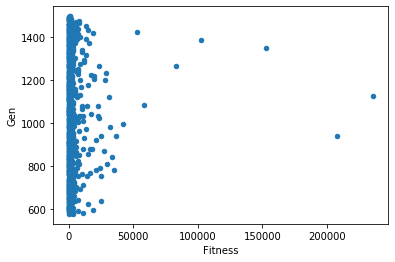

In [36]:
df_EA.plot(kind = "scatter", x = "Fitness", y = "Gen")

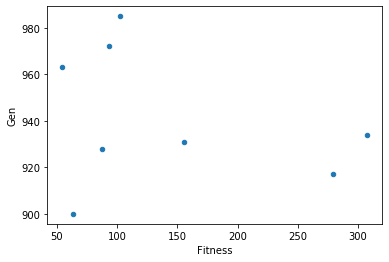

In [37]:
df_GA.plot(kind = "scatter", x = "Fitness", y = "Gen")

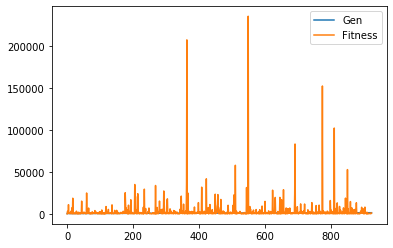

In [38]:
df_EA.plot(kind = "line")